# Python API Crawling Practice 파이썬 API 크롤링 실습

## API 크롤링

- 기존의 크롤링 방식은

1. 내가 직접 홈페이지에 브라우저를 켜서 접근하거나(selenium)
2. 파이썬 자체적으로 호출을 요청해서(requests) 데이터를 가지고 오는 방식

\> 이 방식은 서버에 부하가 많이 갈 뿐더러 나에게 필요없는 데이터까지 한 번에 호출해서 가져오는 문제가 있음.

\> 서비스 제공자측에서는 서버 부하를 줄이고, 사용자에게 맞춤형을 데이터를 제공하기 위해 **API Server** 를 운영

<br>

- **API 서버**: 인가된 데이터만을 개발자에게 넘김 > 서버 안정적 유지 가능,    
필요없는 video data나 picture data 호출하지 않음 > 트래픽 감소 가능

- 횟수 제한이 있는 사이트도 많음. e.g. RIOT 데이터는 1초에 5회, 2분에 100회로 제한됨

- api 서버 접근시 보통 `urllib.request` 를 이용하게 된다

## 영진위 Open API 일일 박스오피스

\> JSON 링크 클릭

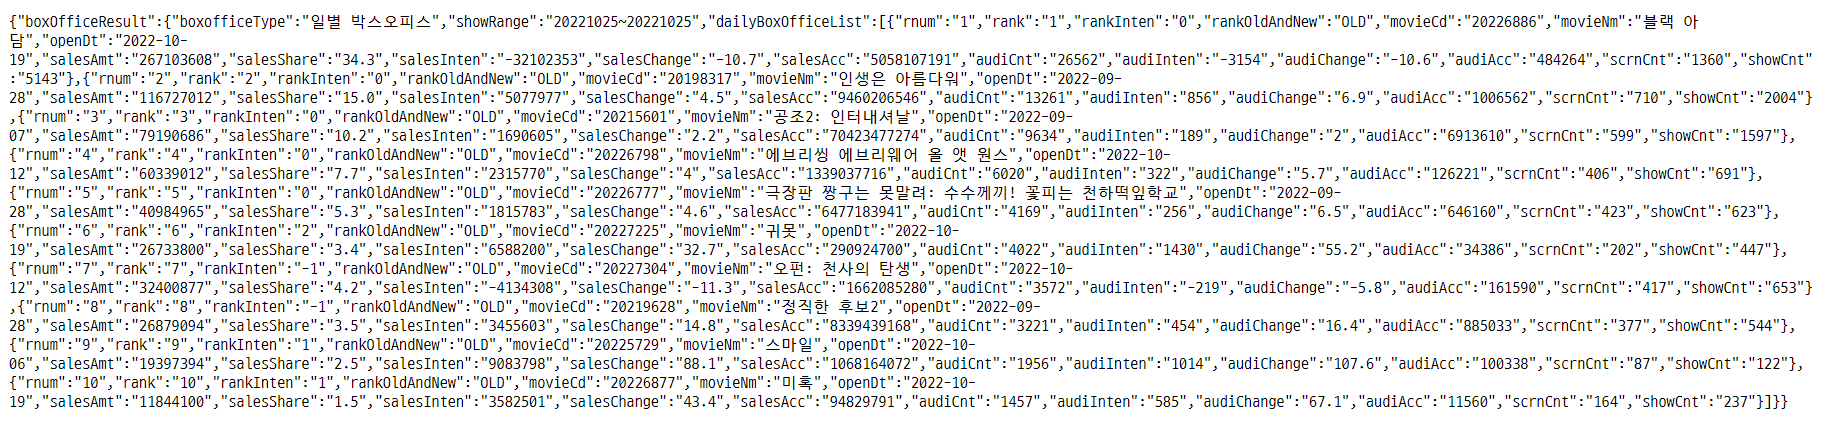


- Open API > 합법적인 Data crawling

- `Rest`방식 rather than `SOAP` 방식(구방식)

- Crawling을 위한 **API Key** 발급

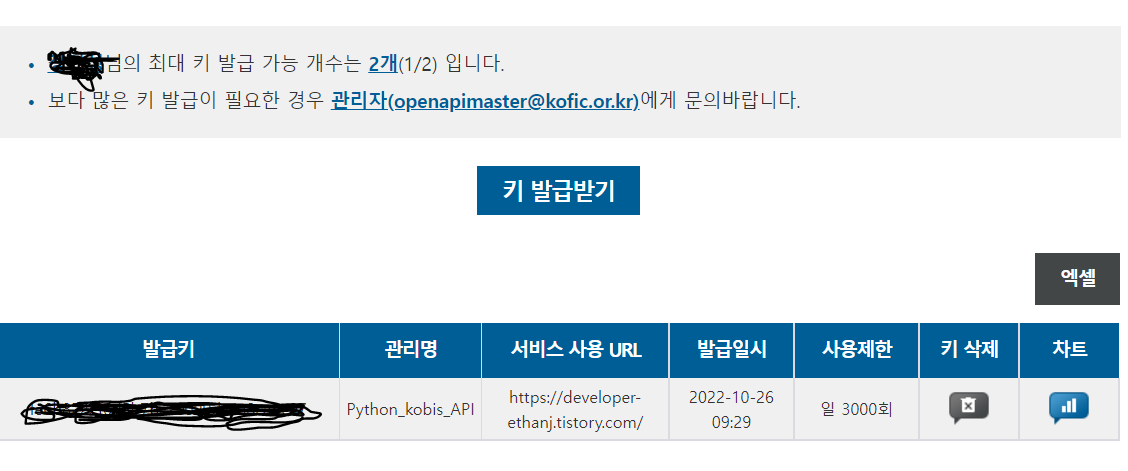

- JSON 링크 `key=`에 발급키 입력

In [2]:
# 사이트에 자료 요청
import urllib.request
# json 데이터 핸들링
import json
# DataFrame 자료형 활용
import pandas as pd
# json 데이터를 pandas DataFrame으로 변환
from pandas.io.json import json_normalize

In [3]:
key = "fe6b8222f6d5b7bc20099dc4a8cabc07"
target_data = "20221025"
json_url = "https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=%s&targetDt=%s" %(key, target_data)

json_url

'https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=fe6b8222f6d5b7bc20099dc4a8cabc07&targetDt=20221025'

## json data를 pandas DataFrame으로 변환

- api data > 일반적으로 json(JavaScript Object Notation) 타입으로 받아짐

- json: 자바스크립트 데이터를 전달하기 좋게 설정한 자료형   
 \> Python의 dict와 문법 거의 같음
 
- json data를 pandas data로 변환한다 > dict data를 pandas DataFrame으로 변환

In [4]:
# 위에 선언해 둔 url을 이용해 api data Python 내부로 가져요기
result = urllib.request.urlopen(json_url)

In [5]:
# 요청 페이지의 결과 데이터를 Python 변수에 저장
json_raw_data = result.read()

<br>

- `.read()` method: 실행 시 데이터 return및 return된 원본 data 삭제 > 반드시 변수에 저장해야 함 

In [6]:
result.read()

b''

<br>

- `b'str'` data: Python byte data type > 바로 DataFrame으로 변환 불가능

In [7]:
json_raw_data

b'{"boxOfficeResult":{"boxofficeType":"\xec\x9d\xbc\xeb\xb3\x84 \xeb\xb0\x95\xec\x8a\xa4\xec\x98\xa4\xed\x94\xbc\xec\x8a\xa4","showRange":"20221025~20221025","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20226886","movieNm":"\xeb\xb8\x94\xeb\x9e\x99 \xec\x95\x84\xeb\x8b\xb4","openDt":"2022-10-19","salesAmt":"267103608","salesShare":"34.3","salesInten":"-32102353","salesChange":"-10.7","salesAcc":"5058107191","audiCnt":"26562","audiInten":"-3154","audiChange":"-10.6","audiAcc":"484264","scrnCnt":"1360","showCnt":"5143"},{"rnum":"2","rank":"2","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20198317","movieNm":"\xec\x9d\xb8\xec\x83\x9d\xec\x9d\x80 \xec\x95\x84\xeb\xa6\x84\xeb\x8b\xa4\xec\x9b\x8c","openDt":"2022-09-28","salesAmt":"116727012","salesShare":"15.0","salesInten":"5077977","salesChange":"4.5","salesAcc":"9460206546","audiCnt":"13261","audiInten":"856","audiChange":"6.9","audiAcc":"1006562","scrnCnt":"710","showCnt":"2004"},{"rnum

In [9]:
# byte data type 확인
type(json_raw_data)

bytes

<br>

- bytes data type: 한글 정상 출력 안됨 > 'utf-8' encoding방식으로 전환

- `.decode('utf-8')`

- 인코딩 방식?

    1. encode: 문자열 data > 컴퓨터 data
        
    2. decode: 컴퓨터 data > 문자열 data

In [12]:
json_utf8 = json_raw_data.decode('utf-8')

# bytes > str data type changed
print(type(json_utf8))
json_utf8

<class 'str'>


'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20221025~20221025","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20226886","movieNm":"블랙 아담","openDt":"2022-10-19","salesAmt":"267103608","salesShare":"34.3","salesInten":"-32102353","salesChange":"-10.7","salesAcc":"5058107191","audiCnt":"26562","audiInten":"-3154","audiChange":"-10.6","audiAcc":"484264","scrnCnt":"1360","showCnt":"5143"},{"rnum":"2","rank":"2","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20198317","movieNm":"인생은 아름다워","openDt":"2022-09-28","salesAmt":"116727012","salesShare":"15.0","salesInten":"5077977","salesChange":"4.5","salesAcc":"9460206546","audiCnt":"13261","audiInten":"856","audiChange":"6.9","audiAcc":"1006562","scrnCnt":"710","showCnt":"2004"},{"rnum":"3","rank":"3","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20215601","movieNm":"공조2: 인터내셔날","openDt":"2022-09-07","salesAmt":"79190686","salesShare":"10.2","salesInten":"1690605","salesChange"

<br>

- str > dict 변환: `json.loads(data)`
    
- dict 형태의 str > 실제 dict data type 변환

In [14]:
json_dict = json.loads(json_utf8)


print(type(json_dict))
json_dict

<class 'dict'>


{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20221025~20221025',
  'dailyBoxOfficeList': [{'rnum': '1',
    'rank': '1',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20226886',
    'movieNm': '블랙 아담',
    'openDt': '2022-10-19',
    'salesAmt': '267103608',
    'salesShare': '34.3',
    'salesInten': '-32102353',
    'salesChange': '-10.7',
    'salesAcc': '5058107191',
    'audiCnt': '26562',
    'audiInten': '-3154',
    'audiChange': '-10.6',
    'audiAcc': '484264',
    'scrnCnt': '1360',
    'showCnt': '5143'},
   {'rnum': '2',
    'rank': '2',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20198317',
    'movieNm': '인생은 아름다워',
    'openDt': '2022-09-28',
    'salesAmt': '116727012',
    'salesShare': '15.0',
    'salesInten': '5077977',
    'salesChange': '4.5',
    'salesAcc': '9460206546',
    'audiCnt': '13261',
    'audiInten': '856',
    'audiChange': '6.9',
    'audiAcc': '1006562',
    'scrnCnt': '710',
    'show

<br>

- 1차적으로 먼저 pandas DataFrame으로 만들기

In [16]:
pd.DataFrame(json_dict)

,boxOfficeResult
boxofficeType,일별 박스오피스
dailyBoxOfficeList,"[{'rnum': '1', 'rank': '1', 'rankInten': '0', ..."
showRange,20221025~20221025


- 원하는 결과 도출되지 않음

<br>

- `boxOfficeResult`=key값인 dict data의 value data 내부 > `dailyBoxOfficeList`=key값인 dict data의 value data에 실제 데이터 존재

In [20]:
json_complete = json_dict['boxOfficeResult']['dailyBoxOfficeList']

json_complete

[{'rnum': '1',
  'rank': '1',
  'rankInten': '0',
  'rankOldAndNew': 'OLD',
  'movieCd': '20226886',
  'movieNm': '블랙 아담',
  'openDt': '2022-10-19',
  'salesAmt': '267103608',
  'salesShare': '34.3',
  'salesInten': '-32102353',
  'salesChange': '-10.7',
  'salesAcc': '5058107191',
  'audiCnt': '26562',
  'audiInten': '-3154',
  'audiChange': '-10.6',
  'audiAcc': '484264',
  'scrnCnt': '1360',
  'showCnt': '5143'},
 {'rnum': '2',
  'rank': '2',
  'rankInten': '0',
  'rankOldAndNew': 'OLD',
  'movieCd': '20198317',
  'movieNm': '인생은 아름다워',
  'openDt': '2022-09-28',
  'salesAmt': '116727012',
  'salesShare': '15.0',
  'salesInten': '5077977',
  'salesChange': '4.5',
  'salesAcc': '9460206546',
  'audiCnt': '13261',
  'audiInten': '856',
  'audiChange': '6.9',
  'audiAcc': '1006562',
  'scrnCnt': '710',
  'showCnt': '2004'},
 {'rnum': '3',
  'rank': '3',
  'rankInten': '0',
  'rankOldAndNew': 'OLD',
  'movieCd': '20215601',
  'movieNm': '공조2: 인터내셔날',
  'openDt': '2022-09-07',
  'salesAmt

In [23]:
daily_data = pd.DataFrame(json_complete)

daily_data

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20226886,블랙 아담,2022-10-19,267103608,34.3,-32102353,-10.7,5058107191,26562,-3154,-10.6,484264,1360,5143
1,2,2,0,OLD,20198317,인생은 아름다워,2022-09-28,116727012,15.0,5077977,4.5,9460206546,13261,856,6.9,1006562,710,2004
2,3,3,0,OLD,20215601,공조2: 인터내셔날,2022-09-07,79190686,10.2,1690605,2.2,70423477274,9634,189,2,6913610,599,1597
3,4,4,0,OLD,20226798,에브리씽 에브리웨어 올 앳 원스,2022-10-12,60339012,7.7,2315770,4,1339037716,6020,322,5.7,126221,406,691
4,5,5,0,OLD,20226777,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교,2022-09-28,40984965,5.3,1815783,4.6,6477183941,4169,256,6.5,646160,423,623
5,6,6,2,OLD,20227225,귀못,2022-10-19,26733800,3.4,6588200,32.7,290924700,4022,1430,55.2,34386,202,447
6,7,7,-1,OLD,20227304,오펀: 천사의 탄생,2022-10-12,32400877,4.2,-4134308,-11.3,1662085280,3572,-219,-5.8,161590,417,653
7,8,8,-1,OLD,20219628,정직한 후보2,2022-09-28,26879094,3.5,3455603,14.8,8339439168,3221,454,16.4,885033,377,544
8,9,9,1,OLD,20225729,스마일,2022-10-06,19397394,2.5,9083798,88.1,1068164072,1956,1014,107.6,100338,87,122
9,10,10,1,OLD,20226877,미혹,2022-10-19,11844100,1.5,3582501,43.4,94829791,1457,585,67.1,11560,164,237


<br>

- 얻어온 data는 empty pandas DataFrame을 만들고, 'date' columns을 추가하면서 `.concat()`으로 누적

In [65]:
my_columns = daily_data.columns

stacked_data = pd.DataFrame(columns=my_columns)
stacked_data

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt


<br>

- "date" columns 추가

In [66]:
stacked_data["date"] = None

stacked_data

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,date


<br>

- 기존 누적 data + 지정 date의 data 적용

In [58]:
final_data = pd.concat([final_data, daily_data])

final_data

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20226886,블랙 아담,2022-10-19,267103608,34.3,-32102353,-10.7,5058107191,26562,-3154,-10.6,484264,1360,5143
1,2,2,0,OLD,20198317,인생은 아름다워,2022-09-28,116727012,15.0,5077977,4.5,9460206546,13261,856,6.9,1006562,710,2004
2,3,3,0,OLD,20215601,공조2: 인터내셔날,2022-09-07,79190686,10.2,1690605,2.2,70423477274,9634,189,2,6913610,599,1597
3,4,4,0,OLD,20226798,에브리씽 에브리웨어 올 앳 원스,2022-10-12,60339012,7.7,2315770,4,1339037716,6020,322,5.7,126221,406,691
4,5,5,0,OLD,20226777,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교,2022-09-28,40984965,5.3,1815783,4.6,6477183941,4169,256,6.5,646160,423,623
5,6,6,2,OLD,20227225,귀못,2022-10-19,26733800,3.4,6588200,32.7,290924700,4022,1430,55.2,34386,202,447
6,7,7,-1,OLD,20227304,오펀: 천사의 탄생,2022-10-12,32400877,4.2,-4134308,-11.3,1662085280,3572,-219,-5.8,161590,417,653
7,8,8,-1,OLD,20219628,정직한 후보2,2022-09-28,26879094,3.5,3455603,14.8,8339439168,3221,454,16.4,885033,377,544
8,9,9,1,OLD,20225729,스마일,2022-10-06,19397394,2.5,9083798,88.1,1068164072,1956,1014,107.6,100338,87,122
9,10,10,1,OLD,20226877,미혹,2022-10-19,11844100,1.5,3582501,43.4,94829791,1457,585,67.1,11560,164,237


<br>

## 날짜 처리

- 영진위 날짜 data: yyyymdd 형식 처리 (2022-10-26 > 20221026)
    
- 날짜 data를 int로 봐서 loop 내에서 +1 처리하면 `20221231 + 1 == 20221232` 로 처리됨

- 날짜 type 따로 지정해서 > 월, 년 증가, 윤년 처리 된 날짜 data 입력 가능

<br>

- 날짜 처리를 위한 `datetime` library import

In [68]:
from datetime import date, timedelta

<br>

- `date(연, 월, 일)` > 날짜 지정 가능

In [72]:
today = date(2022, 10, 26)

print(type(today))
today

<class 'datetime.date'>


datetime.date(2022, 10, 26)

<br>

- `timedelta(days=일, weeks=주)`: `datetime.date` class에 더하기`+` 연산 가능

In [71]:
today + timedelta(days=1)
today

datetime.date(2022, 10, 26)

<br>

- `datetime.date` class를 str로 변환: `date.strftime("형식문자열")`

In [75]:
# %y: `date(2022, 10, 26)` 중 `22`
# %Y: `date(2022, 10, 26)` 중 `2022`
# %m, %d: `date(2022, 10, 26)` 중 각각 `10`, `26`

today.strftime("%Y%m%d")

'20221026'